In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame, Panel

%matplotlib inline

water_filename = "water_quality.csv"
flood_filename = "flood.csv"

water_data = pd.read_csv(water_filename)
flood_data = pd.read_csv(flood_filename)

Here, we convert time format from timestamp to date (YYYY-mm-dd)

GB109053027820
http://environment.data.gov.uk/catchment-planning/WaterBody/GB109053027820

Bristol Avon (By Bk to Netham Weir)

In [25]:
def convertDatetimeandFormat(data, column):
    data[column]=pd.to_datetime(data[column])
    data[column] = data[column].dt.strftime('%Y-%m-%d')
    return data

In [26]:
water_data = convertDatetimeandFormat(water_data, 'sample.sampleDateTime')


Here, we try to analyze the correlation between **water flow and BOD ATU** for a single water body (GB109053027820).

In [27]:
water_df = water_data[['determinand.label', 'sample.sampleDateTime','result', 
                      'determinand.unit.label','stationReference', 'Waterbody ID','water body']]

filtered_water_df = water_df.loc[(water_df['Waterbody ID'] == 'GB109053027820')& (water_df['determinand.label'] == 'Nitrate-N')]


group by 'sample.sampleDateTime','Waterbody ID','determinand.label'

This command is able to get the mean number of pollution variables of each waterbody ID every day.

In [28]:
w_grouped = filtered_water_df.groupby(['sample.sampleDateTime'])['result'].mean()
w_grouped

sample.sampleDateTime
2016-07-05    2.100000
2016-07-13    1.890000
2016-07-21    1.106500
2016-07-26    1.810000
2016-08-05    1.615000
2016-08-11    1.400000
2016-08-19    1.560000
2016-08-22    1.150000
2016-09-13    1.630000
2016-09-19    1.370000
2016-10-04    3.100000
2016-10-12    1.900000
2016-10-19    1.195333
2016-11-01    0.856000
2016-11-09    2.200000
2016-11-15    2.230000
Name: result, dtype: float64

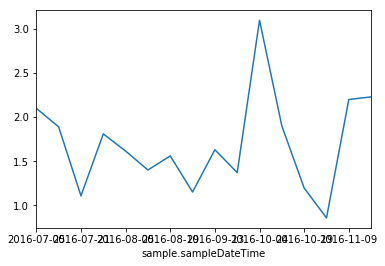

In [29]:
w_grouped.plot()

In [44]:
flood_df = flood_data[['date' ,'parameter','value','Waterbody ID']]

filtered_flood_flow_df = flood_df.loc[(flood_df['date'].isin(w_grouped.index.get_level_values('sample.sampleDateTime').tolist())) & (flood_df['parameter'] == 'flow') & (flood_df['Waterbody ID'] == 'GB109053027820')]
f_grouped_flow = filtered_flood_flow_df.groupby(['date'])['value'].mean()

filtered_flood_level_df = flood_df.loc[(flood_df['date'].isin(w_grouped.index.get_level_values('sample.sampleDateTime').tolist())) & (flood_df['parameter'] == 'level') & (flood_df['Waterbody ID'] == 'GB109053027820')]
f_grouped_level = filtered_flood_level_df.groupby(['date'])['value'].mean()


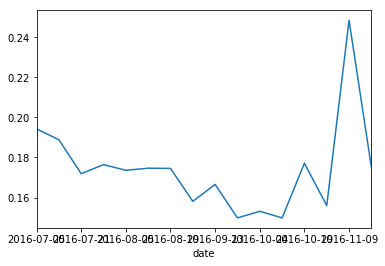

In [45]:
f_grouped_level.plot()

In [47]:
joint_df = DataFrame({'BOD ATU' : w_grouped, 'LEVEL' : f_grouped_level})
joint_df

,BOD ATU,LEVEL
2016-07-05,2.100000,0.194321
2016-07-13,1.890000,0.188876
2016-07-21,1.106500,0.171871
2016-07-26,1.810000,0.176441
2016-08-05,1.615000,0.173600
2016-08-11,1.400000,0.174660
2016-08-19,1.560000,0.174541
2016-08-22,1.150000,0.158062
2016-09-13,1.630000,0.166541
2016-09-19,1.370000,0.149808


Plot the relation.

kind=
- ‘kde’ : Kernel Density Estimation plot
- ‘barh’ : horizontal bar plot
- ‘line’ : line plot (default)

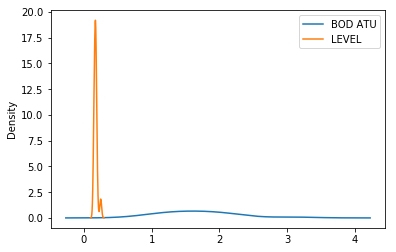

In [48]:
joint_df.plot(kind='kde')

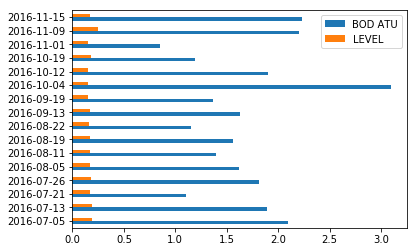

In [49]:
joint_df.plot(kind='barh')

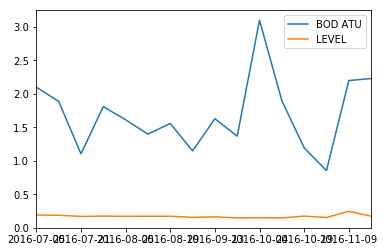

In [50]:
joint_df.plot(kind='line')

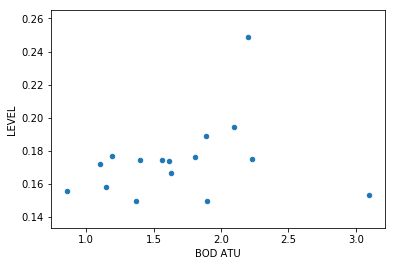

In [56]:
joint_df.plot(kind='scatter', x='BOD ATU', y='LEVEL')

In [53]:
joint_df.corr(method='pearson')

,BOD ATU,LEVEL
BOD ATU,1.000000,0.238444
LEVEL,0.238444,1.000000


In [57]:
joint_df.corr(method='kendall')

,BOD ATU,LEVEL
BOD ATU,1.000000,0.233333
LEVEL,0.233333,1.000000


In [58]:
joint_df.corr(method='spearman')

,BOD ATU,LEVEL
BOD ATU,1.000000,0.288235
LEVEL,0.288235,1.000000
